In [11]:
%matplotlib inline

import numpy as np
import scipy
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import pylab
from sklearn.decomposition import PCA
from sklearn.utils import shuffle

from scipy.ndimage import gaussian_filter

plt.style.use('ggplot')

In [3]:
feature_label = np.load('../data/tag_name.npy')
train_X = np.load('../data/train_X.npy')
train_binary_Y = np.load('../data/train_binary_Y.npy')
valid_test_X = np.load('../data/valid_test_X.npy')

In [4]:
print(feature_label)
print("feature_label shape: " + str(feature_label.shape))
print("train_X shape: " + str(train_X.shape))
print("train_binary_Y shape: " + str(train_binary_Y.shape))
print("valid_test_X shape: " + str(valid_test_X.shape))

['faces' 'left_foot' 'visual_digits' 'left_hand' 'calculation' 'language'
 'horizontal_checkerboard' 'human_sound' 'vertical_checkerboard' 'objects'
 'places' 'scramble' 'right_hand' 'right_foot' 'visual_words' 'visual'
 'non_human_sound' 'auditory' 'saccades']
feature_label shape: (19,)
train_X shape: (4602, 26, 31, 23)
train_binary_Y shape: (4602, 19)
valid_test_X shape: (1971, 26, 31, 23)


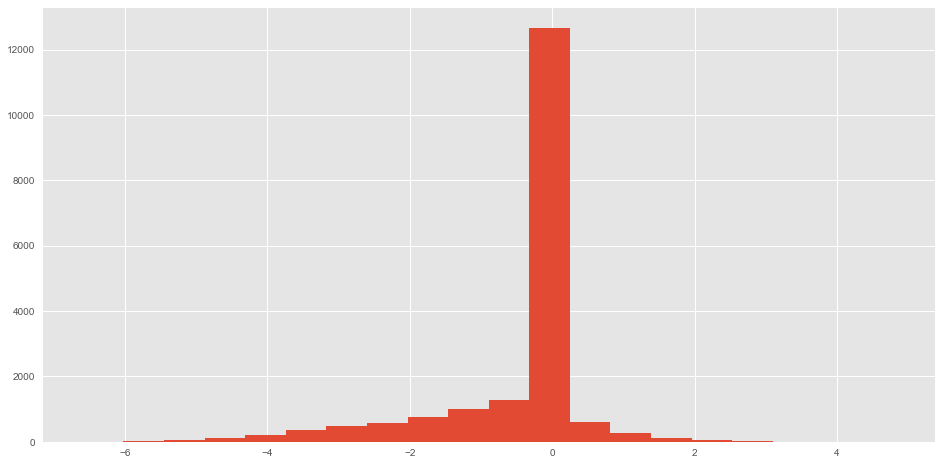

In [5]:
no_sample = 3
image = train_X[no_sample]
plt.figure(figsize=(16,8))
plt.hist(image.flatten(), bins=20)
plt.show()

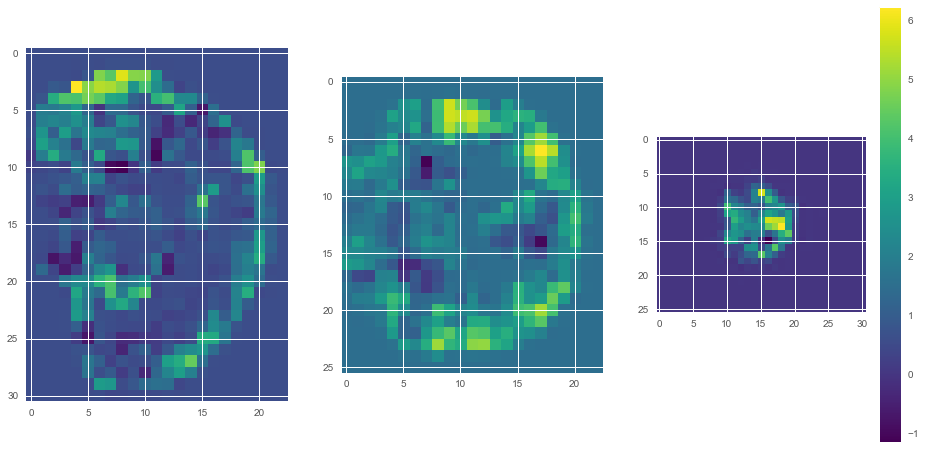

In [39]:
def plot_shape(image, dimension_0, dimension_1, dimension_2):
    
    plt.figure(figsize=(16,8))
    
    cmap = 'viridis'
    
    plt.subplot(1, 3, 1)
    plt.imshow(image[dimension_0,:,:],cmap=cmap)
    
    plt.subplot(1, 3, 2)
    plt.imshow(image[:,dimension_1,:],cmap=cmap)
    
    plt.subplot(1, 3, 3)
    plt.imshow(image[:,:,dimension_2],cmap=cmap)        
    
    plt.colorbar()
    
    plt.show()


sample_no = 100
dimension_0 = 10
dimension_1 = 12
dimension_2 = 20

image = train_X[sample_no]
plot_shape(image, dimension_0, dimension_1, dimension_2)

In [40]:
def normalized_data(images):
    normed = np.zeros(images.shape)
    for idx, image in enumerate(images):
        normed[idx] = gaussian_filter(image, sigma=1)
    return normed

normalized_train_X = normalized_data(train_X)

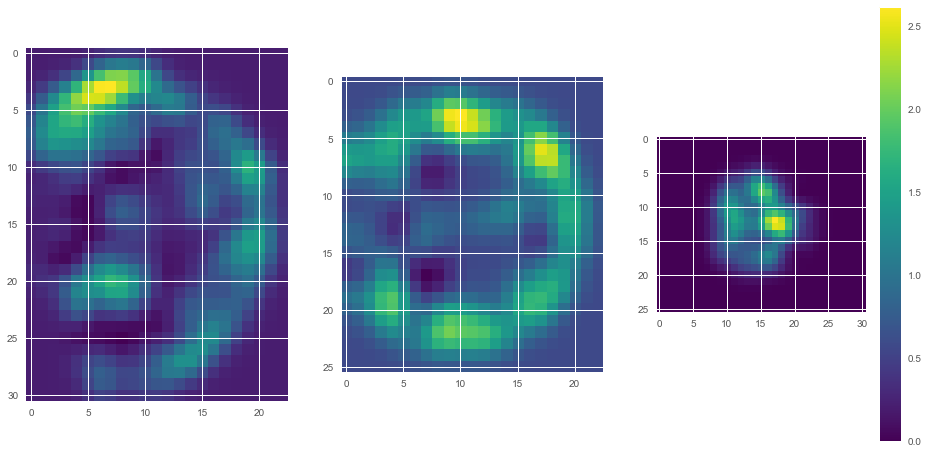

1.2415960138882394

In [41]:
def plot_shape(image, dimension_0, dimension_1, dimension_2):
    
    plt.figure(figsize=(16,8))
    
    cmap = 'viridis'
    
    plt.subplot(1, 3, 1)
    plt.imshow(image[dimension_0,:,:],cmap=cmap)
    
    plt.subplot(1, 3, 2)
    plt.imshow(image[:,dimension_1,:],cmap=cmap)
    
    plt.subplot(1, 3, 3)
    plt.imshow(image[:,:,dimension_2],cmap=cmap)        
    
    plt.colorbar()
    
    plt.show()
    
sample_no = 100
dimension_0 = 10
dimension_1 = 11
dimension_2 = 20

image = normalized_train_X[sample_no]
plot_shape(image, dimension_0, dimension_1, dimension_2)
np.percentile(image.flatten(),90)

In [ ]:
min_set=[]
max_set=[]
mean_set=[]

for image in train_X:
    min_set.append(np.min(image))
    max_set.append(np.max(image))
    mean_set.append(np.mean(image))
    


In [ ]:
plt.figure(figsize=(12,24))

plt.subplot(3, 1, 1)
plt.hist(min_set, bins=50)
plt.title('min')

plt.subplot(3, 1, 2)
plt.hist(max_set, bins=50)
plt.title('max')

plt.subplot(3, 1, 3)
plt.hist(mean_set, bins=50)
plt.title('mean')
    
plt.show()

In [ ]:
train_binary_Y[1]